In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import os

In [12]:
df = pd.read_csv("D:\\datasets\\github_customer_behavior_data\\marketing_campaign.csv", delimiter = '\t')

In [14]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [15]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [16]:
# Assuming your dataframe is df
missing_data = df.isnull().sum()
missing_data

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [17]:
# Calculate percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the percentage of missing data in each column
print(missing_percentage)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64


In [20]:
# Check if there are any missing values in the dataframe
missing_any = df.isnull().values.any()

print(f"Is there any missing data? {missing_any}")

Is there any missing data? True


In [24]:
missing_data_rows = df[df.isnull().any(axis=1)]
print(len(missing_data_rows))
print(missing_data_rows)

24
         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  

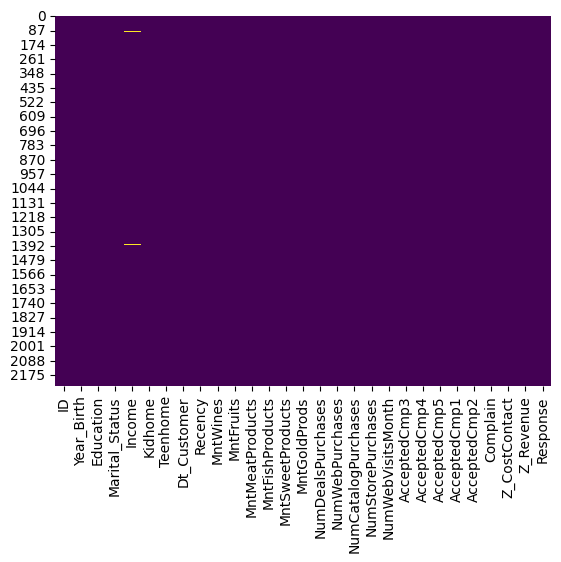

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

In [25]:
# Check correlation of missing data with other variables
missing_corr = df.isnull().corr()
print(missing_corr)

# Group by categorical variables to check if missing data is concentrated in certain groups
missing_by_group = df.groupby('Education')['Income'].apply(lambda x: x.isnull().mean())
print(missing_by_group)

                     ID  Year_Birth  Education  Marital_Status  Income  \
ID                  NaN         NaN        NaN             NaN     NaN   
Year_Birth          NaN         NaN        NaN             NaN     NaN   
Education           NaN         NaN        NaN             NaN     NaN   
Marital_Status      NaN         NaN        NaN             NaN     NaN   
Income              NaN         NaN        NaN             NaN     1.0   
Kidhome             NaN         NaN        NaN             NaN     NaN   
Teenhome            NaN         NaN        NaN             NaN     NaN   
Dt_Customer         NaN         NaN        NaN             NaN     NaN   
Recency             NaN         NaN        NaN             NaN     NaN   
MntWines            NaN         NaN        NaN             NaN     NaN   
MntFruits           NaN         NaN        NaN             NaN     NaN   
MntMeatProducts     NaN         NaN        NaN             NaN     NaN   
MntFishProducts     NaN         NaN   

In [26]:
# Compare descriptive statistics of rows with and without missing data
missing_data_stats = df[df['Income'].isnull()].describe()
non_missing_data_stats = df[df['Income'].notnull()].describe()

print("Rows with missing data stats:\n", missing_data_stats)
print("\nRows without missing data stats:\n", non_missing_data_stats)

Rows with missing data stats:
                  ID   Year_Birth  Income    Kidhome   Teenhome    Recency  \
count     24.000000    24.000000     0.0  24.000000  24.000000  24.000000   
mean    5943.625000  1967.458333     NaN   0.666667   0.583333  58.041667   
std     3028.349268    12.021644     NaN   0.637022   0.583592  29.492046   
min     1295.000000  1943.000000     NaN   0.000000   0.000000   4.000000   
25%     3063.250000  1957.750000     NaN   0.000000   0.000000  35.500000   
50%     5526.500000  1969.500000     NaN   1.000000   1.000000  62.000000   
75%     8597.750000  1974.250000     NaN   1.000000   1.000000  82.250000   
max    10629.000000  1989.000000     NaN   2.000000   2.000000  96.000000   

         MntWines   MntFruits  MntMeatProducts  MntFishProducts  ...  \
count   24.000000   24.000000        24.000000        24.000000  ...   
mean   197.208333   21.333333       162.708333        27.166667  ...   
std    242.479758   38.310705       339.420411        41.28

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare distributions
sns.histplot(df['Income'], kde=True, label='Without Missing Income', color='blue', data=df[df['Income'].notnull()])
sns.histplot(df['Income'], kde=True, label='With Missing Income', color='red', data=df[df['Income'].isnull()])
plt.legend()
plt.title("Comparison of Total Spent with and without Missing Income")
plt.show()

TypeError: histplot() got multiple values for argument 'data'

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# For demonstration purposes, let's say 'Accepted_Any_Campaign' is the target
X = df.drop(columns=['AcceptedCmp1'])
y = df['AcceptedCmp1']

# Fill missing data temporarily for modeling purposes
X = X.fillna(0)  # You can use other imputation strategies here

# Train a random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Feature importance
importance = rf.feature_importances_
feature_importance = pd.Series(importance, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Feature Importance in Lead Scoring')
plt.show()

ValueError: could not convert string to float: 'Graduation'

In [34]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


In [35]:
# Model with missing data dropped
df_dropped = df.dropna(subset=['Income'])
X_dropped = df_dropped.drop(columns=['AcceptedCmp1'])
y_dropped = df_dropped['AcceptedCmp1']

# Model with missing data imputed
df_imputed = df.fillna(df.mean())
X_imputed = df_imputed.drop(columns=['AcceptedCmp1'])
y_imputed = df_imputed['AcceptedCmp1']

# Train models and compare performance (repeat the random forest process above)


TypeError: Could not convert ['GraduationGraduationGraduationGraduationPhDMasterGraduationPhDPhDPhDGraduationBasicGraduationMasterGraduationPhDGraduationGraduationMaster2n CycleGraduationGraduationPhDPhDGraduationGraduationGraduationGraduationGraduationPhDMasterMasterGraduationPhDMasterMasterPhD2n CycleGraduationPhDGraduationMasterGraduationPhDMasterGraduation2n CycleGraduationGraduationPhDGraduationMasterGraduationGraduationGraduationMasterGraduationGraduationGraduationPhDMasterGraduationGraduationPhDGraduationGraduationGraduation2n CycleGraduationGraduationMaster2n CycleGraduationPhDGraduationGraduationMasterGraduation2n CycleGraduationGraduationGraduation2n CycleMasterGraduationGraduationMasterGraduationGraduationGraduationPhDGraduationMasterMasterPhDGraduationGraduationGraduation2n CyclePhD2n CyclePhDGraduationPhDGraduationBasicGraduationGraduationGraduationMasterGraduationPhDMasterGraduationPhDGraduationGraduation2n Cycle2n CycleGraduationMasterMasterMasterGraduationGraduation2n CycleGraduationMasterPhDPhDGraduationMasterGraduationGraduationPhDPhDBasicPhDPhDPhDMasterMasterGraduationPhDGraduationGraduationGraduationGraduation2n CycleMasterMasterGraduation2n CycleGraduationPhDGraduationGraduationGraduationGraduationGraduationMasterPhDGraduationPhDPhDGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationPhDGraduationPhDPhDPhDGraduation2n CyclePhD2n CycleMasterMasterBasicGraduationPhDGraduationGraduationPhDBasicPhD2n CycleGraduationGraduationGraduationMasterGraduationGraduationPhDGraduationGraduationGraduationPhDPhDMasterGraduationMasterGraduationGraduationGraduationGraduationPhDMasterGraduationGraduation2n CycleMasterMasterGraduation2n CycleGraduationPhDPhDGraduationGraduationGraduationGraduationPhDPhDGraduation2n CycleGraduationGraduationPhD2n CycleMasterPhDGraduation2n CycleGraduationGraduationGraduationGraduationGraduationPhDGraduationGraduationPhDMasterMasterGraduationGraduation2n CycleGraduationPhDPhDGraduationGraduationPhDGraduationPhDMasterPhDMasterMasterGraduationPhDGraduationGraduationGraduationMasterPhDGraduationGraduationPhDGraduationMasterPhDMasterBasicGraduationGraduationPhDMasterGraduationGraduationMasterGraduationMaster2n CycleGraduationGraduationGraduationGraduationMaster2n CycleMasterGraduationPhDGraduation2n CyclePhDGraduationGraduationMasterGraduationGraduationMasterMasterGraduationGraduationGraduationMasterGraduationMasterGraduationGraduationGraduationGraduationGraduationGraduationPhDPhDGraduationGraduationPhDGraduationPhDPhDGraduationPhDPhDMasterGraduationGraduationGraduationGraduationGraduationPhDGraduationGraduationPhDPhDBasicGraduationGraduationGraduationGraduationMasterGraduationGraduationPhDGraduationPhDGraduationGraduationPhDMasterPhDGraduationPhDGraduationPhDGraduationGraduationGraduationGraduationGraduationPhD2n CycleGraduationMasterGraduationPhDMasterGraduationGraduationPhDGraduationPhDGraduationGraduation2n CycleMasterGraduationMasterGraduationGraduationPhDGraduationMasterGraduationPhDMasterPhDGraduationGraduationGraduation2n Cycle2n CycleGraduationGraduationGraduationPhDGraduationPhDPhDPhDGraduation2n CycleGraduationPhDGraduationGraduationPhD2n CycleGraduationGraduationMasterPhDGraduationMasterMasterPhDGraduationGraduationGraduation2n CycleGraduationPhDGraduation2n CycleGraduationGraduationMasterGraduationMasterPhD2n CycleGraduationPhDGraduationGraduation2n CycleGraduationMasterGraduationGraduationPhDGraduationGraduationMaster2n CycleGraduationGraduation2n CycleMasterGraduation2n CycleGraduationGraduationPhDGraduationGraduationPhDPhDGraduationGraduationPhDGraduationGraduationPhDGraduationGraduationGraduationPhDMasterPhDGraduationMasterMasterGraduationGraduationMasterPhDMasterGraduationGraduation2n CyclePhDGraduationGraduationMasterPhDMasterGraduationPhDPhDGraduationGraduationMasterBasicPhDMasterGraduationGraduationGraduationGraduationGraduationPhDGraduationGraduationMasterPhDMasterGraduationGraduationGraduationMasterGraduationMasterGraduationGraduationGraduationGraduationPhDMasterGraduationPhD2n CycleGraduationMasterGraduationGraduationMasterGraduationGraduation2n CycleMaster2n CycleGraduationPhDPhDGraduation2n CycleGraduationGraduationGraduationMaster2n CycleGraduationPhDGraduationMasterGraduationPhDGraduation2n CycleGraduationGraduationGraduationMaster2n CyclePhDPhDGraduationMasterGraduationGraduationGraduationPhD2n CyclePhDMasterPhDGraduationGraduationPhDMasterPhDGraduation2n CycleMasterGraduation2n CycleGraduationMasterGraduationGraduationPhDMasterMasterGraduationPhDMasterGraduationMaster2n CycleGraduationGraduationGraduationGraduationPhDMasterMasterGraduationGraduationBasicGraduationMasterMasterBasicGraduationPhDGraduationMasterPhDGraduationMasterPhDGraduationGraduation2n Cycle2n CycleGraduationGraduationGraduationPhDGraduationPhDPhD2n Cycle2n CycleGraduationGraduationGraduationGraduationMasterGraduationGraduationPhDPhDGraduationMasterPhDGraduationMasterMasterGraduationMasterGraduationGraduationPhDGraduationGraduationGraduation2n CyclePhDPhDGraduationGraduationGraduationBasicMasterGraduationPhDBasicPhD2n CyclePhDMasterGraduationGraduationPhDGraduationPhDGraduation2n CyclePhDGraduationGraduation2n CycleGraduationGraduationPhDPhDPhDPhDPhDPhDGraduationMasterBasicMasterMasterGraduationPhDGraduationGraduationGraduationGraduationGraduationMasterMasterGraduationPhDGraduationPhDMasterGraduationMasterGraduationGraduationGraduationPhD2n CycleGraduationGraduationGraduationMasterGraduationPhDGraduationGraduationGraduationGraduationMasterMasterGraduationPhDPhDGraduationPhDGraduationGraduationGraduationMasterBasicGraduationPhDMasterPhD2n CycleGraduationGraduation2n CycleGraduationGraduation2n CyclePhDPhDGraduationGraduationGraduation2n CyclePhDGraduationMasterPhD2n CycleGraduationMasterPhDGraduationGraduationGraduationGraduation2n CycleMasterGraduationPhDGraduationGraduationPhDGraduationPhDPhDMasterGraduationPhDGraduationGraduationGraduationGraduationBasicMasterPhDMasterGraduationMasterPhDGraduationGraduationGraduationMasterPhD2n CycleGraduationGraduationMasterGraduationGraduationPhDGraduationMasterMasterGraduationGraduationGraduationGraduationGraduationGraduationMasterPhDPhDGraduationGraduationGraduation2n CyclePhDGraduationGraduationGraduationGraduation2n CycleGraduationGraduationPhDGraduationPhDGraduationPhD2n CycleGraduationGraduationMasterGraduation2n CycleGraduationGraduationGraduationGraduationGraduation2n CycleGraduation2n CycleMasterGraduationGraduationGraduationPhD2n CyclePhDPhDGraduationMasterGraduationGraduation2n CycleGraduationMasterGraduation2n Cycle2n CyclePhDMasterMasterGraduationGraduationPhDGraduationGraduation2n CycleMasterGraduationMasterGraduationMaster2n CycleGraduationGraduationGraduation2n CyclePhDPhDPhDGraduationGraduationMasterGraduationMasterGraduationBasicPhDPhDGraduationGraduationPhDGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationPhDPhDGraduationPhDMasterGraduationGraduationMasterPhD2n CyclePhDPhDGraduationMasterPhDGraduationMasterGraduation2n CycleGraduationPhDPhDGraduationPhDBasicGraduationPhDGraduationPhDGraduationPhD2n CyclePhDGraduationGraduationBasicPhD2n CycleGraduationGraduation2n CyclePhDPhDMasterPhDMasterPhDGraduationGraduationGraduationPhDGraduationPhDMasterPhDGraduationGraduationGraduationGraduationPhDGraduationGraduationPhD2n Cycle2n CycleMasterGraduationMasterMasterGraduationGraduation2n CycleGraduationMasterGraduationGraduationPhDPhDGraduation2n CyclePhDGraduation2n CycleMasterGraduationGraduationGraduationGraduationGraduationGraduationGraduationPhDPhD2n CycleGraduationPhDGraduationMasterGraduationGraduationPhDGraduationPhDGraduationMasterMasterMaster2n CycleGraduationGraduationGraduationGraduationPhDPhDMasterGraduationPhDGraduationBasicPhD2n CycleGraduationGraduationGraduation2n CycleGraduationGraduationPhDMasterPhDGraduationGraduationGraduationGraduationGraduationGraduationMasterMasterPhDGraduationGraduation2n CyclePhDPhD2n CycleMasterGraduationGraduationPhDGraduationGraduationMasterGraduationPhDPhDPhDGraduationGraduation2n CycleGraduationGraduationPhDGraduationGraduationGraduationGraduationGraduationPhD2n CycleMasterPhDGraduationGraduationGraduationGraduationMasterGraduationGraduationPhDGraduationPhDPhDPhDGraduationPhDPhDGraduationGraduation2n CycleMasterGraduationGraduation2n CycleGraduationGraduationGraduationPhDPhD2n Cycle2n CycleGraduationGraduation2n CyclePhDMasterPhDGraduationPhDMasterBasic2n CycleGraduationPhDMasterGraduationGraduationGraduationGraduationGraduationBasic2n CycleMasterGraduationGraduationGraduationGraduation2n CyclePhDPhDMasterGraduationMasterGraduation2n CyclePhDGraduationMasterGraduationGraduationPhDGraduationPhDGraduationGraduationGraduationMasterPhDGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationPhDGraduation2n CycleGraduationGraduationGraduationBasic2n CyclePhDMasterBasicMasterMasterGraduationGraduationMasterGraduationGraduationPhDBasicGraduationGraduationGraduationPhDPhD2n CycleMasterMasterGraduationGraduationMasterMaster2n CycleMasterPhD2n CycleGraduationGraduationMasterGraduationMasterMasterPhDGraduationPhDGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationPhDPhDGraduationBasicGraduation2n CycleGraduationPhDPhDPhDGraduationMasterMasterGraduationPhDGraduationGraduationPhDGraduationMasterGraduationGraduationGraduationBasicPhDGraduationMasterPhDGraduationBasicGraduationPhDGraduationPhDGraduationPhDGraduationGraduationPhD2n CycleGraduationGraduationGraduationPhDPhDMasterGraduationGraduationGraduationPhDGraduationPhD2n CycleGraduationMasterGraduationMasterMasterGraduationMasterGraduationGraduationGraduationGraduation2n CyclePhDMasterBasicGraduationPhD2n CycleMasterGraduationGraduationGraduation2n CyclePhDPhDMasterPhDGraduationGraduationGraduationMasterGraduation2n CycleGraduationGraduationGraduationGraduationPhDGraduationGraduationPhDMasterMaster2n Cycle2n CyclePhDGraduation2n CycleGraduationGraduationMasterMasterGraduationGraduationBasicMasterGraduationPhDMasterPhDGraduationGraduationGraduationGraduationMasterGraduationGraduationMasterGraduationGraduationGraduationMasterMasterGraduationBasicGraduation2n CyclePhDGraduationPhDPhDGraduationGraduationGraduationGraduationGraduationGraduationPhDGraduationMasterGraduationBasicGraduation2n Cycle2n CycleMasterGraduationGraduationMasterGraduationGraduation2n CycleMasterPhDPhDGraduationGraduationGraduationMasterMasterMaster2n CycleGraduation2n CycleGraduationGraduationPhD2n CycleGraduationGraduationMasterGraduationPhD2n CyclePhDMasterGraduationGraduationMasterPhDGraduationGraduationGraduationGraduationMasterPhDMasterMasterGraduationPhDPhDGraduationMasterGraduationGraduationGraduationBasicGraduationGraduationGraduationPhD2n CycleGraduationPhDGraduationGraduationPhDPhD2n CycleGraduationMaster2n CycleGraduationGraduationGraduation2n CycleGraduation2n CycleGraduationGraduationGraduationMasterGraduationMasterGraduationGraduation2n CycleGraduationPhD2n CycleGraduationGraduationGraduationPhDPhDGraduationGraduationGraduationGraduationPhDMasterGraduationPhDGraduationMasterMasterGraduationGraduationPhDGraduation2n CycleGraduationGraduationPhDGraduationGraduationMasterPhDMasterPhDGraduationGraduation2n CycleGraduation2n CycleMasterMasterPhDGraduationMasterPhDPhDGraduationGraduationGraduationGraduationGraduationPhDGraduationGraduationMaster2n CycleGraduationMasterPhDMasterMaster2n CyclePhDGraduationGraduationMasterGraduationGraduation2n CycleGraduationGraduationGraduationMasterGraduationPhDGraduationGraduationPhDGraduationGraduationPhDGraduationPhDGraduation2n Cycle2n CyclePhDMaster2n Cycle2n CycleGraduationPhDPhDMasterGraduationMasterGraduationPhDGraduationMaster2n CycleGraduationGraduation2n CycleMaster2n CycleGraduationGraduationGraduationMasterMasterGraduationGraduationPhDGraduationMasterGraduationGraduationGraduationGraduationMasterGraduationPhDPhDPhDGraduationMasterMasterGraduationPhDGraduationPhDGraduationMasterGraduationMasterGraduationMasterGraduationPhDMasterGraduationGraduationGraduationPhDGraduationBasicMasterPhDPhDMasterGraduationGraduationPhDMasterMasterMasterGraduationGraduationPhDGraduation2n CycleMasterPhDGraduation2n CycleGraduationGraduationGraduationGraduationGraduationGraduationGraduationMasterPhDGraduation2n CycleGraduationGraduationPhDPhDPhDGraduation2n CyclePhDPhDPhDGraduationPhDPhDGraduationGraduationGraduationMasterMasterPhDGraduationBasic2n CycleMasterMasterGraduationGraduationPhDGraduationGraduationGraduationGraduationPhDMasterMasterPhD2n CycleGraduationPhDGraduationGraduationGraduationPhD2n CyclePhDPhDPhDPhDPhDGraduationMaster2n CycleGraduation2n CycleGraduationBasicPhDGraduationGraduationGraduationPhDPhDGraduationGraduationMasterGraduationGraduationGraduationGraduationMasterPhD2n CycleGraduationGraduation2n CyclePhDPhDMasterGraduationMasterGraduationPhDBasicPhDMasterGraduationGraduationPhDGraduationMasterGraduationGraduationBasicGraduationGraduationGraduationGraduationPhDGraduationPhDGraduationPhDPhDMasterGraduationBasicMasterGraduationPhDGraduationGraduationGraduation2n CycleGraduationGraduationGraduationGraduationPhDGraduationGraduationPhDGraduationPhDGraduationBasicMasterGraduationPhDPhDGraduation2n CyclePhDGraduationBasicGraduationMasterPhDGraduation2n Cycle2n CycleGraduationGraduation2n CycleGraduationPhDGraduationBasicMasterPhDPhDGraduationPhDGraduationGraduationGraduationPhDPhD2n CycleBasicPhDGraduationGraduationGraduationGraduationGraduationGraduation2n CycleGraduationGraduationPhD2n CycleGraduationGraduationMasterGraduationMasterGraduation2n CycleGraduationGraduationMasterGraduationGraduationGraduationPhDGraduationGraduationPhDGraduationPhDMasterGraduationGraduationPhD2n CycleGraduationGraduationPhDGraduationMasterMasterGraduation2n CycleGraduationPhDGraduationMasterMasterGraduationGraduationPhDGraduationGraduationGraduationPhDGraduation2n CyclePhDPhDMasterMasterMasterMasterPhDPhDGraduationPhDGraduation2n CycleGraduationPhDGraduationPhDMasterMasterMasterPhDGraduationPhD2n CycleGraduationGraduationGraduationGraduationMasterGraduationMaster2n CyclePhDGraduationGraduationPhDGraduation2n CycleMasterGraduationPhDGraduationPhDPhDPhDMasterPhDGraduationPhDPhDGraduationGraduationPhDMasterGraduationGraduationGraduationGraduationBasicPhDPhDPhDPhDGraduationMasterGraduationGraduationGraduationPhDGraduationGraduationMaster2n CycleGraduationMasterGraduationPhDGraduationGraduationPhDGraduationPhD2n Cycle2n CycleGraduationMasterGraduationMasterPhDGraduationGraduationMasterPhDPhDMasterMasterGraduation2n CyclePhDPhDMasterGraduationPhDGraduationGraduationGraduationMasterGraduationGraduationMasterGraduationGraduationPhDGraduationGraduationPhDPhDPhDGraduationGraduationGraduationPhDMasterPhDGraduationGraduationGraduationGraduationGraduationGraduationGraduationMasterGraduationGraduationGraduationGraduation2n CycleGraduation2n CyclePhDGraduationMasterGraduationPhDGraduationMasterGraduationGraduationGraduationGraduationGraduationGraduationPhDMasterMasterGraduationGraduation2n CycleGraduationPhDPhD2n CycleGraduationPhDGraduationGraduationMasterGraduationGraduationGraduationPhDPhDGraduationGraduationGraduationBasicGraduation2n CycleGraduationGraduationGraduationGraduationGraduationMasterGraduationMasterPhDMasterGraduationGraduationMaster2n CyclePhDGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationMasterGraduationGraduationGraduationGraduationGraduation2n CycleGraduationGraduationGraduationMasterGraduationGraduationGraduationPhDGraduationMasterGraduationPhDPhDGraduationGraduationGraduationGraduationPhDGraduationGraduationGraduationGraduationGraduationPhDGraduationGraduationMasterBasicGraduationMasterGraduationGraduationGraduationGraduationMasterGraduation2n CycleGraduationGraduationMasterMasterBasicGraduationGraduationMasterPhDGraduationGraduationMasterGraduationMasterPhD2n CyclePhDBasicBasicMasterGraduationMasterGraduationGraduationPhDGraduationMasterMasterMaster2n CyclePhDMasterGraduationMaster2n CycleGraduation2n CycleGraduationGraduationGraduationPhDPhDGraduationGraduationMasterPhDBasicMasterGraduationGraduationGraduationMasterMasterGraduationGraduationGraduationGraduationGraduationGraduationPhDMasterPhDPhDMasterGraduationGraduationGraduationMaster2n Cycle2n CycleMasterPhDGraduationPhDGraduationGraduation2n CycleBasicPhDGraduationMasterGraduationGraduationGraduation2n CycleGraduationGraduationGraduationPhDMasterPhDGraduationGraduationGraduationPhDGraduationBasic2n CycleGraduationMasterPhDMasterBasicMasterGraduationGraduation2n CycleGraduationMasterGraduationGraduationGraduationGraduationBasicGraduationPhDGraduationGraduationGraduationGraduationGraduationBasicGraduation2n CycleGraduationMaster2n CycleGraduationGraduationGraduationPhDGraduationMasterGraduationMaster2n CycleMasterPhDGraduationGraduationGraduation2n CycleGraduationGraduationMasterGraduationGraduationGraduationGraduationPhDGraduationMasterPhD'
 'SingleSingleTogetherTogetherMarriedTogetherDivorcedMarriedTogetherTogetherMarriedMarriedDivorcedDivorcedMarriedSingleMarriedTogetherMarriedSingleMarriedMarriedMarriedMarriedTogetherSingleMarriedSingleMarriedMarriedDivorcedTogetherTogetherDivorcedMarriedSingleMarriedMarriedWidowDivorcedMarriedMarriedTogetherSingleMarriedSingleMarriedTogetherSingleMarriedWidowMarriedSingleDivorcedMarriedTogetherDivorcedSingleSingleMarriedSingleTogetherSingleWidowTogetherMarriedTogetherSingleTogetherTogetherMarriedMarriedMarriedMarriedMarriedDivorcedMarriedSingleTogetherTogetherSingleMarriedMarriedTogetherDivorcedMarriedMarriedSingleMarriedTogetherMarriedSingleTogetherSingleMarriedMarriedWidowDivorcedMarriedMarriedSingleSingleTogetherMarriedMarriedTogetherMarriedMarriedSingleMarriedTogetherSingleTogetherSingleMarriedSingleMarriedMarriedTogetherTogetherTogetherSingleMarriedDivorcedSingleTogetherSingleMarriedMarriedTogetherMarriedAloneMarriedMarriedMarriedTogetherDivorcedMarriedAloneDivorcedSingleTogetherMarriedSingleTogetherMarriedMarriedTogetherMarriedMarriedMarriedMarriedTogetherAloneTogetherTogetherSingleSingleTogetherSingleSingleMarriedMarriedDivorcedMarriedTogetherDivorcedDivorcedSingleTogetherTogetherMarriedMarriedTogetherSingleMarriedMarriedMarriedTogetherMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedTogetherTogetherDivorcedMarriedMarriedMarriedMarriedMarriedMarriedSingleDivorcedSingleDivorcedTogetherSingleSingleTogetherDivorcedMarriedDivorcedTogetherTogetherMarriedTogetherMarriedMarriedSingleMarriedWidowTogetherTogetherMarriedTogetherMarriedDivorcedTogetherTogetherDivorcedMarriedTogetherSingleDivorcedTogetherSingleMarriedMarriedTogetherSingleSingleSingleWidowTogetherSingleMarriedMarriedMarriedMarriedMarriedMarriedTogetherSingleSingleDivorcedTogetherTogetherSingleTogetherSingleSingleSingleDivorcedDivorcedMarriedMarriedTogetherMarriedMarriedMarriedMarriedTogetherSingleSingleTogetherMarriedDivorcedTogetherSingleTogetherSingleDivorcedMarriedTogetherTogetherTogetherMarriedMarriedTogetherTogetherWidowDivorcedTogetherTogetherMarriedTogetherTogetherTogetherDivorcedTogetherSingleDivorcedDivorcedTogetherMarriedSingleTogetherMarriedWidowSingleMarriedTogetherDivorcedMarriedMarriedSingleMarriedTogetherMarriedSingleMarriedSingleMarriedMarriedDivorcedDivorcedSingleMarriedDivorcedMarriedMarriedSingleSingleSingleMarriedMarriedTogetherDivorcedDivorcedMarriedTogetherTogetherSingleDivorcedMarriedTogetherTogetherDivorcedMarriedDivorcedWidowMarriedMarriedMarriedSingleMarriedSingleSingleMarriedMarriedMarriedTogetherMarriedWidowMarriedMarriedMarriedSingleMarriedDivorcedTogetherSingleMarriedMarriedSingleSingleSingleSingleSingleSingleTogetherSingleMarriedMarriedWidowMarriedSingleSingleTogetherTogetherTogetherDivorcedTogetherTogetherSingleMarriedMarriedTogetherMarriedTogetherSingleTogetherDivorcedTogetherSingleTogetherSingleMarriedSingleDivorcedTogetherMarriedSingleMarriedMarriedSingleTogetherMarriedTogetherTogetherSingleMarriedMarriedMarriedTogetherMarriedMarriedMarriedMarriedMarriedTogetherMarriedSingleMarriedTogetherMarriedSingleTogetherDivorcedWidowMarriedMarriedMarriedMarriedMarriedSingleMarriedDivorcedDivorcedSingleMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedTogetherMarriedWidowWidowMarriedMarriedSingleTogetherWidowMarriedTogetherMarriedMarriedTogetherMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedDivorcedSingleMarriedTogetherDivorcedTogetherMarriedMarriedWidowTogetherDivorcedTogetherSingleDivorcedDivorcedDivorcedTogetherTogetherMarriedTogetherTogetherMarriedMarriedTogetherWidowMarriedSingleMarriedDivorcedTogetherSingleMarriedTogetherTogetherSingleMarriedSingleTogetherMarriedDivorcedSingleMarriedMarriedMarriedMarriedTogetherMarriedSingleMarriedWidowSingleTogetherMarriedSingleTogetherTogetherDivorcedTogetherSingleTogetherWidowSingleMarriedTogetherMarriedWidowMarriedMarriedMarriedSingleSingleSingleMarriedMarriedTogetherSingleMarriedMarriedTogetherMarriedSingleTogetherMarriedDivorcedTogetherSingleTogetherSingleTogetherMarriedMarriedSingleTogetherMarriedMarriedMarriedMarriedTogetherTogetherMarriedTogetherTogetherMarriedTogetherTogetherWidowMarriedTogetherTogetherSingleMarriedSingleTogetherMarriedTogetherDivorcedMarriedMarriedTogetherSingleTogetherSingleMarriedTogetherSingleWidowDivorcedMarriedMarriedSingleWidowMarriedMarriedSingleMarriedSingleTogetherWidowMarriedMarriedSingleWidowSingleMarriedMarriedSingleTogetherDivorcedSingleMarriedTogetherMarriedSingleSingleDivorcedSingleMarriedDivorcedMarriedTogetherTogetherDivorcedSingleTogetherMarriedTogetherDivorcedMarriedTogetherSingleTogetherMarriedTogetherDivorcedDivorcedTogetherTogetherTogetherSingleTogetherMarriedWidowMarriedTogetherMarriedTogetherSingleMarriedMarriedMarriedSingleWidowMarriedSingleMarriedMarriedSingleMarriedSingleDivorcedDivorcedTogetherTogetherTogetherDivorcedSingleMarriedTogetherTogetherDivorcedSingleTogetherTogetherWidowMarriedSingleSingleSingleTogetherDivorcedMarriedDivorcedSingleDivorcedMarriedDivorcedDivorcedTogetherMarriedMarriedSingleSingleTogetherTogetherMarriedDivorcedTogetherDivorcedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedDivorcedMarriedTogetherDivorcedTogetherMarriedDivorcedDivorcedMarriedMarriedTogetherMarriedTogetherSingleTogetherSingleTogetherMarriedTogetherMarriedSingleSingleMarriedTogetherTogetherWidowMarriedTogetherTogetherTogetherMarriedMarriedMarriedMarriedSingleMarriedSingleSingleMarriedMarriedTogetherMarriedMarriedMarriedMarriedSingleMarriedTogetherTogetherSingleTogetherSingleSingleSingleTogetherSingleMarriedTogetherMarriedTogetherDivorcedMarriedDivorcedTogetherMarriedSingleMarriedSingleSingleMarriedDivorcedTogetherMarriedMarriedWidowMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleSingleMarriedTogetherTogetherMarriedSingleMarriedMarriedSingleMarriedSingleMarriedTogetherDivorcedMarriedDivorcedWidowTogetherDivorcedSingleTogetherTogetherMarriedMarriedSingleDivorcedSingleSingleTogetherMarriedSingleMarriedMarriedTogetherSingleSingleSingleMarriedSingleMarriedMarriedTogetherMarriedSingleMarriedMarriedTogetherMarriedTogetherTogetherMarriedTogetherSingleTogetherSingleSingleTogetherTogetherTogetherSingleTogetherSingleTogetherTogetherDivorcedMarriedSingleTogetherSingleMarriedDivorcedMarriedSingleTogetherSingleMarriedTogetherSingleMarriedWidowMarriedSingleDivorcedSingleTogetherDivorcedMarriedDivorcedMarriedDivorcedTogetherTogetherTogetherSingleSingleWidowTogetherMarriedSingleTogetherWidowMarriedSingleMarriedTogetherMarriedSingleSingleTogetherSingleSingleMarriedTogetherTogetherMarriedSingleSingleMarriedTogetherSingleSingleMarriedSingleTogetherTogetherMarriedSingleDivorcedSingleTogetherDivorcedTogetherSingleMarriedMarriedDivorcedTogetherDivorcedTogetherTogetherDivorcedSingleTogetherMarriedMarriedSingleMarriedDivorcedDivorcedSingleTogetherMarriedMarriedTogetherMarriedMarriedMarriedTogetherMarriedTogetherMarriedDivorcedTogetherMarriedTogetherMarriedMarriedTogetherWidowDivorcedDivorcedDivorcedMarriedMarriedMarriedMarriedSingleWidowDivorcedMarriedTogetherSingleDivorcedSingleTogetherTogetherMarriedDivorcedWidowSingleMarriedTogetherMarriedSingleMarriedTogetherMarriedSingleTogetherTogetherSingleTogetherMarriedMarriedMarriedTogetherMarriedSingleMarriedTogetherTogetherTogetherMarriedMarriedSingleSingleDivorcedTogetherTogetherSingleTogetherMarriedMarriedSingleTogetherSingleMarriedMarriedMarriedMarriedSingleTogetherTogetherSingleMarriedMarriedTogetherMarriedMarriedTogetherMarriedDivorcedMarriedSingleMarriedMarriedSingleTogetherMarriedTogetherSingleDivorcedMarriedMarriedSingleDivorcedDivorcedMarriedTogetherTogetherTogetherMarriedTogetherTogetherMarriedTogetherSingleMarriedSingleMarriedMarriedTogetherSingleMarriedSingleTogetherTogetherSingleMarriedSingleTogetherSingleMarriedSingleDivorcedSingleTogetherMarriedDivorcedMarriedMarriedTogetherMarriedSingleMarriedMarriedMarriedMarriedDivorcedSingleSingleSingleSingleTogetherMarriedMarriedTogetherMarriedSingleMarriedDivorcedSingleMarriedDivorcedSingleTogetherSingleDivorcedMarriedSingleMarriedTogetherSingleTogetherMarriedDivorcedDivorcedMarriedTogetherMarriedDivorcedSingleWidowTogetherTogetherTogetherMarriedSingleWidowTogetherMarriedTogetherMarriedSingleMarriedTogetherMarriedMarriedMarriedTogetherMarriedTogetherMarriedMarriedMarriedTogetherMarriedSingleMarriedMarriedMarriedMarriedTogetherMarriedMarriedMarriedDivorcedSingleTogetherMarriedDivorcedSingleSingleSingleMarriedSingleTogetherMarriedDivorcedWidowDivorcedSingleMarriedDivorcedMarriedMarriedMarriedWidowMarriedMarriedMarriedDivorcedTogetherMarriedMarriedMarriedTogetherTogetherTogetherTogetherTogetherTogetherMarriedSingleSingleTogetherTogetherSingleSingleMarriedDivorcedMarriedWidowMarriedSingleMarriedMarriedMarriedDivorcedTogetherDivorcedTogetherTogetherMarriedTogetherTogetherMarriedSingleSingleMarriedSingleTogetherTogetherDivorcedSingleTogetherTogetherMarriedMarriedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedMarriedTogetherDivorcedDivorcedTogetherMarriedSingleDivorcedMarriedTogetherMarriedSingleMarriedSingleSingleMarriedDivorcedMarriedMarriedMarriedDivorcedMarriedTogetherDivorcedMarriedTogetherMarriedDivorcedMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleSingleTogetherTogetherTogetherMarriedSingleTogetherTogetherMarriedDivorcedMarriedTogetherTogetherMarriedMarriedTogetherMarriedSingleTogetherTogetherMarriedSingleTogetherMarriedMarriedTogetherMarriedTogetherTogetherSingleMarriedMarriedMarriedMarriedSingleTogetherMarriedMarriedMarriedSingleMarriedMarriedTogetherMarriedWidowSingleTogetherMarriedMarriedMarriedSingleSingleMarriedMarriedTogetherDivorcedTogetherSingleTogetherMarriedMarriedSingleMarriedSingleSingleSingleTogetherMarriedDivorcedTogetherDivorcedSingleSingleMarriedDivorcedMarriedSingleTogetherSingleDivorcedMarriedSingleSingleMarriedTogetherTogetherDivorcedTogetherTogetherSingleMarriedMarriedTogetherTogetherTogetherTogetherMarriedTogetherTogetherSingleMarriedMarriedDivorcedDivorcedDivorcedMarriedMarriedMarriedMarriedSingleMarriedMarriedTogetherMarriedMarriedDivorcedMarriedMarriedMarriedMarriedSingleSingleTogetherTogetherMarriedMarriedTogetherSingleSingleTogetherMarriedMarriedMarriedMarriedSingleSingleMarriedDivorcedMarriedSingleDivorcedMarriedMarriedTogetherMarriedMarriedTogetherMarriedTogetherWidowTogetherMarriedMarriedMarriedTogetherTogetherTogetherMarriedSingleSingleTogetherTogetherDivorcedTogetherSingleMarriedWidowTogetherTogetherTogetherMarriedDivorcedMarriedTogetherMarriedTogetherMarriedMarriedSingleMarriedMarriedTogetherSingleMarriedSingleMarriedSingleTogetherTogetherMarriedTogetherSingleTogetherTogetherMarriedTogetherMarriedDivorcedTogetherTogetherMarriedMarriedDivorcedTogetherTogetherMarriedTogetherDivorcedMarriedMarriedSingleMarriedMarriedTogetherMarriedTogetherMarriedSingleMarriedMarriedTogetherSingleMarriedMarriedMarriedSingleSingleTogetherSingleMarriedSingleMarriedWidowTogetherSingleTogetherMarriedTogetherMarriedSingleMarriedSingleSingleWidowMarriedSingleTogetherTogetherMarriedSingleDivorcedTogetherMarriedSingleWidowMarriedDivorcedMarriedMarriedTogetherMarriedMarriedTogetherDivorcedDivorcedDivorcedMarriedMarriedMarriedDivorcedMarriedSingleSingleTogetherMarriedMarriedSingleMarriedSingleMarriedMarriedTogetherTogetherTogetherMarriedSingleTogetherTogetherDivorcedTogetherDivorcedDivorcedTogetherMarriedMarriedMarriedTogetherMarriedTogetherTogetherSingleSingleTogetherSingleMarriedMarriedMarriedMarriedDivorcedTogetherMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedSingleSingleMarriedMarriedTogetherSingleMarriedMarriedTogetherMarriedTogetherSingleTogetherMarriedWidowDivorcedTogetherTogetherTogetherTogetherMarriedTogetherTogetherMarriedDivorcedMarriedMarriedTogetherTogetherDivorcedTogetherTogetherTogetherDivorcedMarriedSingleDivorcedWidowMarriedSingleWidowTogetherWidowSingleTogetherMarriedTogetherSingleSingleTogetherDivorcedSingleSingleSingleMarriedMarriedMarriedMarriedSingleTogetherMarriedMarriedMarriedTogetherMarriedSingleMarriedMarriedTogetherTogetherMarriedMarriedMarriedMarriedDivorcedTogetherSingleSingleSingleDivorcedMarriedSingleMarriedDivorcedTogetherMarriedDivorcedWidowMarriedMarriedSingleTogetherTogetherMarriedTogetherTogetherMarriedMarriedMarriedMarriedTogetherMarriedSingleTogetherSingleMarriedTogetherMarriedMarriedMarriedSingleWidowSingleSingleTogetherSingleTogetherMarriedTogetherMarriedDivorcedTogetherSingleDivorcedSingleMarriedMarriedMarriedTogetherTogetherSingleTogetherDivorcedMarriedTogetherMarriedDivorcedMarriedTogetherMarriedSingleWidowWidowSingleMarriedSingleMarriedMarriedMarriedDivorcedTogetherMarriedMarriedMarriedSingleTogetherMarriedMarriedDivorcedMarriedSingleTogetherMarriedTogetherSingleMarriedTogetherMarriedSingleSingleMarriedTogetherTogetherSingleMarriedTogetherTogetherTogetherTogetherSingleTogetherSingleTogetherMarriedSingleSingleTogetherTogetherTogetherTogetherTogetherSingleMarriedTogetherSingleSingleMarriedSingleTogetherSingleMarriedTogetherDivorcedTogetherTogetherSingleMarriedTogetherTogetherDivorcedSingleMarriedTogetherMarriedWidowTogetherMarriedTogetherSingleTogetherMarriedTogetherMarriedTogetherMarriedMarriedMarriedDivorcedTogetherWidowDivorcedTogetherTogetherMarriedMarriedMarriedMarriedSingleSingleTogetherMarriedTogetherSingleDivorcedSingleTogetherMarriedTogetherMarriedDivorcedSingleMarriedMarriedWidowTogetherSingleTogetherTogetherDivorcedDivorcedSingleSingleDivorcedSingleWidowMarriedTogetherDivorcedMarriedMarriedDivorcedSingleSingleSingleMarriedDivorcedTogetherMarriedMarriedTogetherMarriedDivorcedSingleDivorcedTogetherSingleSingleTogetherMarriedSingleMarriedDivorcedMarriedMarriedMarriedTogetherMarriedMarriedTogetherSingleTogetherMarriedWidowSingleMarriedSingleSingleTogetherSingleMarriedSingleSingleSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedTogetherSingleWidowMarriedMarriedMarriedTogetherSingleMarriedMarriedWidowMarriedMarriedSingleTogetherSingleMarriedSingleTogetherSingleWidowTogetherSingleSingleWidowMarriedWidowMarriedSingleDivorcedTogetherTogetherTogetherWidowTogetherDivorcedSingleTogetherMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedDivorcedMarriedMarriedSingleTogetherMarriedMarriedMarriedMarriedDivorcedMarriedSingleSingleTogetherMarriedMarriedTogetherMarriedSingleSingleDivorcedMarriedSingleSingleMarriedMarriedDivorcedDivorcedTogetherDivorcedSingleTogetherMarriedSingleMarriedMarriedTogetherDivorcedTogetherTogetherMarriedMarriedMarriedMarriedMarriedTogetherDivorcedTogetherTogetherWidowMarriedMarriedTogetherMarriedTogetherMarriedSingleMarriedTogetherSingleSingleMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedSingleWidowSingleTogetherSingleDivorcedDivorcedMarriedTogetherTogetherSingleTogetherTogetherMarriedWidowMarriedMarriedMarriedTogetherTogetherMarriedMarriedSingleMarriedDivorcedMarriedWidowMarriedTogetherMarriedSingleMarriedMarriedWidowMarriedMarriedMarriedSingleMarriedDivorcedTogetherTogetherAbsurdTogetherMarriedTogetherSingleMarriedMarriedMarriedTogetherMarriedMarriedMarriedMarriedMarriedDivorcedMarriedSingleWidowTogetherTogetherTogetherMarriedTogetherMarriedTogetherSingleDivorcedTogetherTogetherMarriedMarriedTogetherTogetherMarriedMarriedTogetherTogetherDivorcedSingleMarriedMarriedAbsurdMarriedWidowSingleDivorcedDivorcedDivorcedMarriedDivorcedMarriedSingleSingleTogetherTogetherTogetherMarriedMarriedMarriedMarriedWidowTogetherMarriedDivorcedTogetherMarriedSingleMarriedTogetherTogetherWidowSingleSingleDivorcedSingleMarriedSingleSingleDivorcedTogetherMarriedMarriedMarriedDivorcedYOLOMarriedTogetherMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedTogetherMarriedSingleDivorcedMarriedMarriedMarriedSingleSingleTogetherMarriedMarriedSingleSingleYOLOMarriedMarriedSingleMarriedTogetherTogetherDivorcedDivorcedTogetherDivorcedSingleMarriedTogetherTogetherWidowTogetherTogetherMarriedSingleTogetherMarriedSingleTogetherMarriedSingleTogetherMarriedSingleSingleSingleTogetherMarriedMarriedTogetherDivorcedTogetherMarried'
 '04-09-201208-03-201421-08-201310-02-201419-01-201409-09-201313-11-201208-05-201306-06-201313-03-201415-11-201313-11-201215-11-201315-11-201310-10-201224-11-201224-12-201231-08-201228-03-201303-11-201208-08-201206-01-201323-12-201211-01-201418-03-201302-01-201327-05-201320-02-201331-05-201322-11-201322-05-201411-05-201310-10-201229-10-201220-02-201329-08-201331-12-201302-09-201311-02-201401-02-201329-04-201312-03-201324-12-201205-11-201302-10-201328-06-201409-11-201224-05-201301-01-201408-11-201212-05-201411-08-201202-01-201307-06-201412-06-201319-11-201202-04-201328-04-201417-06-201303-03-201404-07-201307-09-201218-02-201311-06-201306-12-201321-05-201311-05-201419-03-201427-09-201308-04-201311-09-201214-09-201217-03-201305-04-201330-04-201419-12-201227-08-201212-10-201204-09-201302-01-201329-08-201223-06-201303-07-201311-05-201325-02-201411-08-201316-07-201328-05-201412-05-201421-01-201419-11-201227-05-201423-11-201323-03-201424-05-201422-05-201422-11-201211-04-201301-12-201320-06-201323-07-201330-03-201420-04-201317-05-201308-05-201410-12-201324-09-201302-02-201319-12-201207-12-201202-11-201310-11-201225-06-201402-01-201312-12-201210-09-201324-01-201419-02-201311-07-201314-11-201320-06-201324-02-201404-09-201322-04-201312-03-201318-02-201321-04-201308-06-201411-07-201310-05-201430-09-201310-03-201310-02-201411-08-201314-08-201317-03-201308-08-201207-07-201319-05-201428-07-201319-10-201214-11-201319-04-201328-08-201319-03-201318-10-201228-10-201228-08-201322-08-201221-06-201424-04-201407-03-201414-12-201212-05-201409-10-201219-02-201308-07-201312-09-201317-10-201320-08-201301-07-201305-11-201205-01-201401-05-201301-03-201413-11-201318-11-201328-08-201302-11-201325-02-201421-04-201413-07-201321-04-201430-01-201404-04-201412-09-201216-12-201223-05-201424-06-201401-12-201311-05-201410-05-201428-09-201322-01-201415-06-201405-12-201208-03-201402-08-201319-03-201323-02-201309-09-201217-05-201326-09-201330-05-201318-02-201329-12-201313-05-201419-09-201317-01-201331-03-201429-06-201409-12-201314-10-201302-11-201217-07-201310-11-201208-12-201313-05-201308-06-201410-09-201231-03-201318-03-201405-10-201221-01-201304-05-201301-04-201412-05-201415-11-201331-08-201314-11-201211-04-201414-11-201314-04-201405-01-201308-09-201226-03-201325-10-201209-12-201208-08-201216-02-201420-03-201305-01-201315-05-201316-04-201423-03-201309-12-201304-12-201304-10-201326-12-201317-05-201428-10-201323-12-201231-07-201328-11-201317-08-201205-06-201420-05-201309-01-201331-08-201229-10-201216-09-201327-10-201305-04-201322-09-201229-08-201213-10-201216-10-201222-10-201204-06-201308-12-201310-10-201222-05-201317-06-201423-11-201203-02-201314-03-201326-06-201415-10-201219-06-201304-10-201322-09-201220-03-201404-02-201406-04-201406-02-201316-09-201317-01-201330-04-201402-04-201321-04-201311-02-201325-10-201231-08-201201-03-201417-04-201412-07-201329-01-201308-01-201312-05-201413-06-201304-07-201327-12-201331-10-201215-01-201412-03-201323-08-201207-03-201313-01-201312-01-201317-03-201416-04-201412-10-201301-03-201413-04-201427-12-201328-03-201318-09-201205-03-201410-09-201327-04-201318-01-201428-10-201303-06-201306-02-201317-12-201311-03-201429-07-201314-08-201216-07-201323-08-201317-01-201301-07-201309-02-201407-02-201311-01-201305-07-201302-07-201307-11-201309-05-201313-02-201316-04-201311-09-201303-04-201310-01-201330-06-201312-09-201206-12-201212-11-201203-03-201326-09-201310-08-201207-12-201323-11-201213-06-201315-08-201310-11-201323-06-201316-06-201425-12-201203-01-201417-12-201310-01-201328-10-201327-10-201222-12-201229-11-201311-05-201312-12-201220-08-201308-10-201328-09-201222-03-201424-02-201423-11-201228-12-201221-08-201217-05-201316-03-201317-11-201201-12-201222-04-201428-10-201229-08-201311-11-201222-06-201318-08-201218-03-201330-12-201202-10-201314-06-201308-01-201314-11-201312-12-201222-08-201230-03-201415-05-201316-10-201305-10-201230-08-201208-05-201303-01-201409-12-201304-05-201418-04-201325-02-201406-10-201315-09-201231-08-201224-12-201209-11-201223-03-201327-09-201215-08-201311-03-201322-10-201309-06-201430-08-201230-05-201406-06-201317-10-201217-11-201209-11-201230-03-201322-08-201223-01-201331-03-201420-11-201314-02-201422-02-201305-03-201306-05-201422-05-201405-06-201404-06-201313-04-201304-12-201324-04-201405-04-201404-05-201425-04-201309-05-201329-10-201223-01-201325-11-201302-02-201421-06-201321-12-201307-09-201322-08-201307-02-201304-07-201320-12-201306-08-201330-12-201217-03-201413-07-201309-10-201329-12-201309-06-201322-12-201302-05-201316-02-201317-10-201301-12-201307-09-201220-08-201215-09-201201-04-201325-05-201425-09-201201-01-201422-09-201328-01-201426-06-201424-02-201403-03-201423-04-201331-10-201206-03-201415-08-201227-03-201310-10-201304-08-201202-01-201318-05-201418-02-201309-05-201423-05-201423-10-201231-10-201230-12-201311-08-201319-08-201230-10-201310-10-201214-09-201214-11-201326-06-201326-01-201428-10-201224-09-201203-12-201222-02-201312-01-201327-11-201313-04-201305-04-201421-04-201322-05-201403-04-201306-08-201215-11-201329-12-201224-08-201221-06-201307-11-201202-12-201319-07-201321-06-201316-12-201225-05-201328-03-201320-10-201317-03-201411-05-201314-04-201303-02-201330-06-201323-08-201301-03-201427-01-201401-03-201416-08-201330-09-201208-09-201204-12-201227-11-201308-06-201412-08-201203-11-201315-02-201318-09-201318-06-201424-04-201317-06-201311-04-201318-01-201415-02-201408-08-201323-12-201307-11-201306-08-201228-11-201207-08-201304-06-201308-03-201407-01-201403-12-201326-01-201429-03-201431-03-201408-04-201407-02-201418-04-201306-11-201312-09-201201-03-201305-04-201303-08-201322-05-201309-09-201316-06-201325-06-201315-01-201405-11-201307-06-201405-12-201207-09-201305-07-201307-12-201212-09-201227-01-201413-09-201301-08-201302-10-201331-01-201301-04-201423-08-201316-09-201309-07-201310-11-201218-03-201320-10-201315-04-201303-04-201418-04-201423-09-201214-09-201317-05-201420-08-201312-10-201212-12-201210-11-201330-01-201411-09-201319-09-201326-10-201219-10-201304-06-201317-08-201221-02-201331-08-201217-09-201309-12-201226-01-201329-12-201211-02-201411-03-201326-10-201207-05-201419-08-201318-07-201311-12-201228-10-201309-11-201226-07-201306-05-201303-06-201318-03-201317-08-201211-07-201314-07-201310-03-201428-12-201303-06-201320-01-201303-06-201321-09-201206-09-201218-12-201219-11-201313-06-201415-01-201415-02-201418-04-201310-03-201404-06-201308-01-201328-09-201206-11-201305-10-201213-05-201430-12-201207-05-201310-03-201318-08-201321-01-201313-12-201323-05-201416-09-201317-02-201427-08-201212-08-201213-04-201403-08-201207-02-201404-01-201422-09-201231-08-201321-10-201307-12-201214-11-201325-12-201307-09-201201-01-201328-12-201216-05-201325-09-201309-05-201307-11-201329-07-201308-11-201312-09-201216-12-201301-12-201222-05-201430-10-201202-01-201416-06-201323-12-201318-10-201330-08-201225-07-201324-10-201319-12-201307-03-201312-09-201204-08-201216-05-201430-09-201304-10-201225-08-201312-07-201302-11-201329-05-201326-07-201326-03-201408-04-201303-11-201309-04-201417-09-201312-03-201411-02-201429-04-201426-12-201310-01-201327-06-201410-04-201321-11-201310-01-201312-07-201321-10-201220-02-201314-05-201307-08-201307-12-201223-09-201211-02-201331-03-201329-03-201419-12-201202-05-201323-05-201413-02-201301-08-201208-06-201423-11-201325-01-201411-10-201315-04-201327-09-201307-08-201212-06-201316-10-201309-10-201329-04-201429-03-201303-06-201418-03-201309-08-201223-03-201306-03-201301-01-201401-08-201325-01-201412-05-201309-12-201309-03-201415-09-201329-01-201431-12-201303-10-201325-12-201328-02-201302-05-201409-02-201311-08-201219-09-201315-03-201306-04-201403-10-201324-04-201428-10-201310-05-201322-05-201427-04-201311-09-201205-09-201201-09-201326-05-201303-07-201312-12-201324-04-201313-04-201308-12-201206-03-201330-08-201326-01-201418-12-201312-09-201305-04-201414-04-201411-05-201419-03-201418-06-201329-10-201215-02-201402-01-201329-05-201408-09-201215-01-201307-11-201219-07-201329-10-201305-04-201320-01-201328-06-201423-10-201202-03-201314-12-201313-12-201326-03-201319-01-201305-11-201306-04-201304-11-201323-03-201421-10-201322-03-201306-04-201316-10-201320-04-201331-05-201404-02-201323-11-201312-05-201412-03-201424-11-201229-03-201401-09-201305-05-201308-08-201315-06-201418-04-201322-05-201316-04-201307-05-201312-01-201311-05-201301-03-201422-11-201310-09-201205-05-201302-10-201314-02-201329-03-201325-04-201323-09-201202-07-201321-03-201405-08-201329-11-201212-05-201410-11-201227-07-201313-01-201429-09-201224-12-201223-10-201310-05-201313-06-201311-01-201406-11-201226-05-201417-03-201401-04-201304-03-201419-02-201304-10-201205-05-201326-01-201415-02-201409-01-201304-10-201217-12-201311-06-201326-03-201324-09-201306-05-201317-10-201228-09-201306-01-201411-06-201404-04-201406-10-201317-09-201330-06-201314-02-201305-04-201417-01-201310-02-201416-10-201223-07-201319-06-201412-09-201202-07-201326-11-201211-12-201301-04-201316-12-201309-02-201308-09-201214-01-201430-04-201401-02-201312-12-201207-08-201323-01-201411-08-201322-10-201306-02-201316-08-201314-07-201304-12-201324-03-201309-04-201421-11-201302-12-201304-01-201410-03-201429-06-201307-11-201325-01-201314-07-201303-12-201211-05-201326-12-201307-08-201317-11-201318-05-201313-04-201417-04-201324-01-201304-05-201418-05-201431-08-201210-02-201430-12-201304-05-201417-11-201308-04-201410-02-201412-08-201222-12-201222-05-201425-05-201424-10-201322-05-201314-07-201309-08-201310-06-201320-07-201328-05-201304-03-201322-12-201201-10-201216-02-201430-09-201306-12-201301-10-201210-05-201408-05-201429-01-201311-05-201311-05-201410-02-201301-12-201217-08-201207-05-201427-04-201321-09-201207-05-201430-12-201214-10-201325-06-201412-09-201319-08-201312-10-201213-04-201313-10-201202-02-201417-01-201312-11-201217-11-201314-10-201203-02-201401-08-201211-10-201303-01-201412-09-201312-07-201322-06-201407-08-201314-10-201315-08-201321-08-201325-11-201325-10-201312-05-201329-06-201421-03-201429-11-201231-08-201218-02-201422-06-201426-03-201409-11-201325-02-201413-08-201303-11-201310-09-201209-10-201327-03-201313-02-201317-05-201302-02-201305-11-201212-05-201326-01-201410-05-201325-08-201211-01-201407-03-201310-09-201218-04-201419-04-201407-04-201428-05-201303-01-201320-02-201319-06-201407-07-201304-03-201324-06-201403-11-201208-04-201321-08-201329-01-201301-08-201304-11-201229-06-201317-01-201325-06-201422-01-201312-05-201429-08-201226-02-201418-09-201330-03-201429-05-201323-04-201403-11-201218-09-201223-05-201430-07-201313-10-201225-09-201313-10-201313-11-201205-07-201307-04-201405-06-201416-02-201314-02-201305-04-201305-10-201229-08-201209-08-201327-11-201231-03-201301-10-201225-07-201310-01-201319-05-201411-04-201412-09-201201-05-201403-08-201204-08-201204-03-201425-05-201403-12-201230-11-201224-02-201418-07-201303-07-201301-05-201320-08-201322-01-201422-04-201317-03-201417-11-201222-08-201217-08-201302-02-201304-02-201312-10-201304-01-201303-05-201417-03-201429-05-201426-04-201423-08-201322-06-201312-03-201407-08-201302-06-201431-10-201223-04-201302-01-201308-10-201320-05-201302-08-201326-10-201324-03-201415-11-201319-06-201403-08-201330-01-201431-05-201425-02-201301-03-201309-02-201417-02-201430-08-201328-08-201316-10-201320-09-201316-01-201312-09-201306-10-201322-11-201217-05-201324-12-201318-11-201218-12-201208-08-201224-04-201412-01-201320-12-201315-01-201310-10-201307-06-201412-11-201229-10-201324-05-201405-08-201203-05-201322-05-201402-02-201320-06-201331-01-201311-05-201417-08-201305-11-201321-01-201419-11-201314-09-201212-11-201313-10-201206-07-201329-08-201229-08-201222-09-201203-04-201428-05-201421-07-201305-12-201229-05-201411-03-201323-03-201414-09-201220-10-201222-08-201213-10-201323-05-201305-07-201322-08-201229-05-201322-01-201417-02-201417-03-201426-08-201212-01-201408-01-201313-11-201303-11-201217-05-201313-04-201313-02-201413-01-201305-01-201319-01-201303-05-201308-05-201402-08-201322-08-201325-08-201306-12-201227-02-201422-12-201217-11-201220-04-201417-02-201422-04-201321-04-201301-09-201331-03-201305-04-201409-09-201211-09-201325-01-201331-12-201310-10-201217-08-201320-02-201322-11-201329-10-201316-02-201422-05-201312-10-201315-04-201327-10-201312-03-201331-10-201228-06-201317-07-201308-08-201206-10-201319-01-201322-08-201222-09-201326-01-201330-07-201322-09-201328-04-201312-10-201322-10-201215-08-201330-03-201415-02-201329-06-201309-02-201421-03-201302-05-201426-05-201417-04-201404-10-201304-07-201329-11-201318-01-201403-10-201324-05-201420-04-201404-08-201218-05-201403-12-201205-04-201324-03-201424-05-201427-08-201316-07-201322-02-201312-09-201318-10-201330-07-201203-08-201212-05-201419-03-201416-08-201319-05-201422-05-201305-12-201306-07-201306-03-201408-10-201324-09-201208-02-201320-08-201321-06-201407-04-201422-01-201326-08-201219-03-201321-11-201226-02-201316-12-201301-01-201321-09-201229-11-201309-08-201218-08-201220-09-201221-07-201305-11-201214-03-201323-11-201208-06-201310-02-201330-12-201205-09-201331-07-201318-03-201407-12-201312-04-201429-03-201425-10-201324-06-201319-02-201427-12-201204-06-201304-03-201318-02-201425-02-201301-11-201228-06-201303-04-201323-05-201414-01-201422-07-201331-01-201423-11-201226-08-201306-11-201311-01-201420-04-201301-10-201310-06-201429-07-201301-02-201422-04-201306-06-201307-01-201403-09-201229-03-201414-02-201318-04-201425-09-201312-12-201317-11-201307-03-201412-12-201218-09-201329-07-201318-08-201217-09-201308-05-201320-04-201416-10-201308-08-201229-05-201421-11-201201-10-201216-02-201320-03-201320-02-201310-02-201320-06-201331-08-201303-05-201330-03-201321-10-201308-11-201227-01-201409-11-201217-03-201322-04-201328-04-201429-12-201304-10-201326-09-201223-11-201330-05-201331-07-201225-07-201304-09-201207-11-201325-11-201326-12-201313-05-201429-04-201425-12-201306-05-201304-10-201203-03-201302-12-201230-12-201320-08-201325-06-201301-04-201305-05-201403-07-201303-09-201212-01-201406-10-201215-01-201402-03-201420-08-201316-12-201202-05-201411-10-201303-10-201302-03-201409-11-201215-05-201430-07-201322-05-201407-02-201421-04-201310-12-201225-08-201229-03-201421-04-201413-08-201212-10-201207-08-201211-04-201317-12-201308-09-201206-09-201228-09-201220-05-201318-02-201422-01-201413-02-201310-06-201316-01-201323-02-201416-03-201428-01-201411-04-201413-10-201311-11-201216-02-201428-12-201204-05-201313-04-201316-09-201330-03-201404-03-201305-04-201313-02-201419-12-201323-12-201330-10-201304-05-201325-08-201225-01-201323-04-201414-02-201318-07-201321-09-201303-09-201224-10-201227-09-201315-10-201316-12-201201-12-201225-10-201323-03-201417-02-201309-06-201413-11-201330-09-201328-08-201225-06-201413-10-201212-01-201312-02-201414-09-201226-01-201419-08-201313-04-201418-06-201408-07-201320-06-201313-02-201312-05-201308-02-201416-01-201321-12-201302-05-201327-04-201301-09-201216-11-201212-02-201323-11-201202-11-201328-10-201324-01-201401-04-201331-08-201216-10-201322-08-201302-08-201203-03-201322-06-201410-06-201411-01-201310-11-201324-06-201321-01-201327-07-201301-10-201311-12-201326-01-201401-12-201316-08-201213-11-201213-01-201311-02-201313-02-201417-08-201205-11-201220-08-201220-03-201409-07-201307-11-201225-10-201308-06-201302-02-201418-08-201225-11-201227-04-201430-04-201311-03-201428-11-201209-09-201320-09-201311-11-201203-06-201326-05-201307-02-201406-05-201413-04-201320-11-201205-04-201411-12-201224-02-201424-03-201311-12-201215-05-201314-06-201418-08-201204-09-201205-10-201220-12-201307-12-201316-10-201212-01-201328-03-201408-03-201329-11-201226-05-201331-08-201213-01-201302-09-201309-11-201220-01-201329-03-201312-10-201308-03-201402-09-201223-05-201412-08-201215-09-201328-10-201214-06-201323-01-201321-07-201314-02-201304-11-201301-11-201218-06-201416-06-201419-01-201302-12-201215-04-201427-09-201227-03-201324-11-201203-11-201213-02-201428-10-201317-08-201229-03-201323-03-201428-04-201421-06-201323-01-201323-01-201411-12-201302-12-201323-04-201425-02-201419-05-201419-08-201227-06-201410-04-201324-12-201306-12-201214-02-201331-08-201226-08-201305-04-201418-10-201215-02-201415-10-201328-09-201225-04-201427-06-201326-09-201201-06-201330-08-201302-03-201427-07-201316-01-201330-03-201309-03-201411-04-201410-08-201204-12-201217-08-201309-08-201329-12-201305-10-201327-10-201318-05-201427-01-201408-11-201220-08-201312-01-201325-09-201216-01-201323-01-201303-03-201408-09-201217-03-201322-02-201425-10-201331-08-201321-10-201324-03-201419-06-201308-10-201312-04-201317-06-201302-10-201319-06-201427-06-201323-03-201423-09-201327-10-201210-12-201302-05-201410-05-201312-12-201316-06-201418-05-201307-05-201426-02-201420-08-201207-09-201229-04-201322-07-201308-03-201428-05-201302-02-201424-07-201323-06-201402-05-201315-05-201329-05-201410-01-201411-09-201319-06-201320-08-201329-12-201319-11-201322-02-201330-07-201305-09-201311-01-201303-06-201322-11-201228-11-201225-03-201327-06-201312-02-201323-01-201408-10-201317-01-201403-11-201204-06-201425-10-201325-03-201408-08-201223-07-201304-01-201319-07-201319-07-201306-07-201319-02-201327-08-201231-12-201223-05-201319-09-201227-02-201322-09-201205-03-201431-08-201230-03-201420-11-201321-03-201402-10-201223-09-201320-09-201216-08-201202-01-201401-03-201417-06-201428-08-201309-04-201310-11-201229-05-201413-11-201220-05-201308-05-201405-09-201325-11-201213-01-201301-05-201314-12-201302-04-201428-01-201418-04-201429-10-201207-01-201308-03-201317-02-201323-03-201428-12-201227-04-201312-03-201406-05-201318-02-201324-04-201426-11-201324-05-201411-12-201324-04-201418-04-201328-05-201416-01-201320-01-201326-10-201220-11-201228-09-201329-05-201303-03-201316-10-201212-09-201227-02-201412-02-201325-12-201217-03-201306-11-201304-08-201310-05-201426-05-201310-09-201310-03-201323-10-201320-08-201307-09-201326-03-201316-06-201408-05-201315-06-201420-10-201318-09-201218-04-201305-10-201208-06-201318-03-201429-10-201229-08-201213-10-201206-08-201301-08-201317-12-201217-02-201414-10-201228-11-201301-01-201303-11-201221-09-201209-12-201328-08-201202-11-201305-08-201312-04-201415-08-201307-02-201413-07-201314-06-201303-10-201316-04-201406-06-201402-05-201427-06-201414-10-201228-04-201320-03-201310-01-201408-06-201307-12-201304-06-201328-04-201405-11-201204-10-201216-11-201228-06-201420-01-201314-02-201321-07-201328-09-201319-07-201331-08-201315-06-201407-04-201411-10-201304-10-201309-08-201304-09-201215-09-201325-08-201315-02-201323-05-201322-05-201308-10-201315-03-201317-02-201320-03-201411-09-201310-12-201209-09-201322-03-201303-08-201222-09-201211-02-201303-06-201323-04-201431-08-201307-12-201312-09-201223-06-201408-07-201311-01-201402-02-201418-09-201219-05-201329-10-201211-01-201310-09-201312-08-201317-11-201204-07-201326-01-201318-09-201207-11-201215-12-201307-08-201314-10-201309-11-201207-10-201206-09-201311-05-201401-10-201210-03-201401-03-201412-06-201316-04-201402-01-201319-04-201407-02-201416-08-201221-01-201419-02-201315-07-201315-10-201230-04-201418-04-201419-05-201319-05-201403-11-201219-01-201407-11-201309-09-201326-02-201331-08-201202-05-201427-01-201303-06-201426-05-201420-10-201309-09-201231-03-201428-05-201413-06-201323-02-201313-04-201418-03-201424-10-201325-01-201411-05-201306-09-201305-02-201419-03-201326-09-201320-04-201410-11-201214-10-201222-08-201225-01-201324-08-201216-02-201331-05-201320-02-201326-12-201222-06-201419-01-201420-10-201201-10-201308-01-201305-09-201323-11-201223-06-201313-11-201217-06-201320-11-201328-09-201307-01-201401-04-201408-04-201306-09-201210-03-201319-11-201223-03-201431-08-201306-02-201414-01-201307-08-201225-04-201414-09-201206-02-201302-11-201220-06-201431-03-201312-02-201308-07-201318-09-201312-05-201413-08-201223-11-201303-05-201417-01-201422-10-201223-04-201307-05-201403-07-201309-07-201317-06-201406-05-201305-01-201424-08-201322-10-201328-02-201427-02-201323-01-201414-02-201325-03-201401-01-201307-04-201307-11-201305-10-201302-08-201220-09-201310-04-201405-12-201227-02-201318-09-201212-02-201410-06-201312-02-201324-12-201206-02-201322-06-201321-10-201313-04-201416-12-201328-03-201317-10-201303-04-201417-04-201323-05-201429-08-201225-12-201216-01-201302-01-201408-03-201324-12-201306-09-201212-06-201418-09-201307-11-201326-11-201213-02-201317-09-201302-03-201420-05-201314-02-201306-08-201327-01-201307-08-201229-03-201301-03-201315-04-201330-03-201425-09-201212-02-201405-04-201321-01-201405-02-201416-02-201323-02-201412-03-201317-10-201307-09-201201-08-201210-03-201326-11-201312-11-201329-04-201328-09-201305-12-201304-10-201201-06-201328-03-201308-02-201302-05-201325-09-201229-11-201301-12-201311-09-201230-11-201309-06-201411-09-201317-08-201227-12-201309-03-201322-09-201322-06-201402-06-201426-06-201419-03-201306-10-201221-07-201305-01-201318-05-201327-12-201331-05-201325-10-201312-01-201312-08-201206-01-201306-09-201329-10-201205-04-201419-10-201305-08-201325-12-201315-09-201310-01-201307-07-201307-02-201405-07-201327-03-201403-03-201323-06-201326-08-201218-10-201307-11-201213-01-201330-10-201316-02-201315-12-201231-03-201404-10-201306-11-201331-08-201321-10-201302-05-201419-12-201207-09-201221-05-201330-09-201328-05-201329-09-201229-11-201220-03-201422-05-201417-09-201219-02-201428-02-201329-10-201210-06-201315-12-201208-06-201317-09-201202-06-201321-12-201216-05-201401-11-201324-07-201304-12-201326-08-201321-01-201410-04-201318-10-201212-09-201210-08-201330-08-201203-08-201220-06-201404-10-201302-08-201330-03-201303-09-201203-11-201322-04-201311-03-201329-08-201314-08-201210-01-201406-04-201402-10-201311-05-201401-03-201406-08-201230-01-201423-01-201401-02-201328-02-201417-01-201423-11-201325-03-201424-03-201406-07-201312-10-201315-12-201317-09-201228-01-201402-10-201327-06-201312-05-201429-04-201422-01-201412-03-201425-01-201411-10-201204-03-201401-08-201303-06-201328-10-201324-06-201314-02-201327-03-201323-12-201323-11-201305-03-201428-06-201317-01-201429-07-201310-03-201411-01-201322-12-201218-10-201207-01-201324-10-201304-11-201307-03-201323-04-201420-05-201318-03-201410-01-201306-02-201411-05-201410-01-201416-03-201425-02-201321-02-201302-08-201206-11-201201-08-201222-03-201321-04-201421-08-201318-06-201326-06-201405-08-201323-11-201218-10-201202-01-201316-02-201315-10-201211-08-201223-03-201407-12-201215-07-201313-02-201305-02-201401-05-201412-10-201230-07-201320-12-201221-03-201305-04-201419-06-201314-10-201226-11-201304-07-201307-05-201325-06-201409-01-201426-09-201224-03-201303-03-201312-08-201218-05-201416-03-201321-08-201217-08-201202-06-201301-07-201313-06-201310-06-201425-01-201424-01-201415-10-2012'] to numeric

In [36]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [37]:
import pandas as pd

# Assuming df is the DataFrame containing your data
df_clean = df.dropna()

# Check that missing rows are removed
print(f"Remaining rows after dropping missing data: {df_clean.shape[0]}")

Remaining rows after dropping missing data: 2216


In [38]:
df_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [40]:
# Feature: Total amount spent on all products
df_clean.loc[:, 'Total_Spent'] = df_clean[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Feature: Family size (children + teenagers)
df_clean.loc[:, 'Family_Size'] = df_clean['Kidhome'] + df_clean['Teenhome']

# Feature: Engagement level (based on website visits and recency)
df_clean.loc[:, 'Engagement'] = df_clean['NumWebVisitsMonth'] / df_clean['Recency']

# Feature: Number of campaigns accepted
df_clean.loc[:, 'Total_Accepted_Campaigns'] = df_clean[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Check the newly created features
print(df_clean[['Total_Spent', 'Family_Size', 'Engagement', 'Total_Accepted_Campaigns']].head())

   Total_Spent  Family_Size  Engagement  Total_Accepted_Campaigns
0         1617            0    0.120690                         0
1           27            2    0.131579                         0
2          776            0    0.153846                         0
3           53            1    0.230769                         0
4          422            1    0.053191                         0


In [41]:
df_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spent,Family_Size,Engagement,Total_Accepted_Campaigns
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,1617,0,0.120690,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,27,2,0.131579,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,776,0,0.153846,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,53,1,0.230769,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,422,1,0.053191,0


In [43]:
def calculate_lead_score(row):
    score = 0
    
    # Income-based scoring
    if row['Income'] > 70000:
        score += 10
    elif row['Income'] > 50000:
        score += 5
    else:
        score += 2
    
    # Total Spending-based scoring
    if row['Total_Spent'] > 1000:
        score += 10
    elif row['Total_Spent'] > 500:
        score += 5
    else:
        score += 2
    
    # Family size scoring (larger families may require more purchases)
    if row['Family_Size'] > 2:
        score += 5
    else:
        score += 2
    
    # Engagement-based scoring
    if row['Engagement'] > 0.1:
        score += 10
    elif row['Engagement'] > 0.05:
        score += 5
    else:
        score += 2
    
    # Campaign acceptance-based scoring
    if row['Total_Accepted_Campaigns'] > 2:
        score += 10
    elif row['Total_Accepted_Campaigns'] > 0:
        score += 5
    
    return score

# Apply the scoring function to the DataFrame
df_clean.loc[:, 'Lead_Score'] = df_clean.apply(calculate_lead_score, axis=1)

# Display the top scored leads
print(df_clean[['Income', 'Total_Spent', 'Family_Size', 'Engagement', 'Total_Accepted_Campaigns', 'Lead_Score']].sort_values(by='Lead_Score', ascending=False).head())

       Income  Total_Spent  Family_Size  Engagement  Total_Accepted_Campaigns  \
1711  77520.0         1526            1    0.133333                         3   
1961  71670.0         1766            0    0.750000                         3   
336   75693.0         1442            0    0.400000                         3   
430   84865.0         1688            0    4.000000                         4   
417   80134.0         1378            0    0.454545                         4   

      Lead_Score  
1711          42  
1961          42  
336           42  
430           42  
417           42  


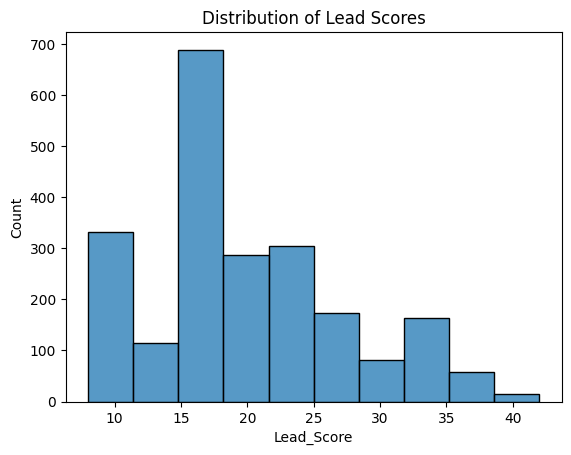

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of lead scores
sns.histplot(df_clean['Lead_Score'], bins=10)
plt.title("Distribution of Lead Scores")
plt.show()